Library & Dataset import

In [2]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [4]:
#Read DataFrame
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Analysis

In [5]:
#Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [6]:
#Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
#Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

In [8]:
#Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
516,20,male,35.310,1,no,southeast,27724.28875,obese
1078,28,male,31.680,0,yes,southeast,34672.14720,obese
917,45,male,22.895,0,yes,northeast,35069.37452,normal
971,34,female,23.560,0,no,northeast,4992.37640,normal
1051,64,male,26.410,0,no,northeast,14394.55790,overweight
1046,43,female,25.080,0,no,northeast,7325.04820,overweight
20,60,female,36.005,0,no,northeast,13228.84695,obese
662,32,female,31.540,1,no,northeast,5148.55260,obese
1,18,male,33.770,1,no,southeast,1725.55230,obese
1140,50,male,37.070,1,no,southeast,9048.02730,obese


In [9]:
#Describe Categorical Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [10]:
#Describe Numerical Values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [12]:
#Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [13]:
#Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [14]:


#Check Children Feature
df.groupby(['children'])['charges'].count()



children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [15]:
#Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

Graph

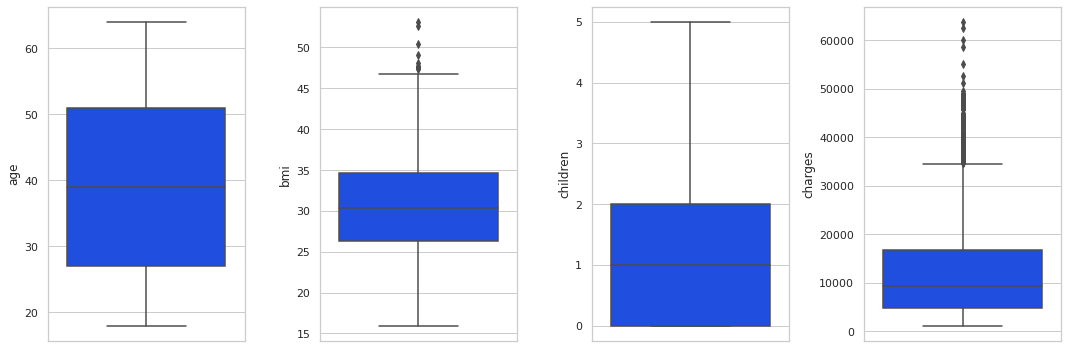

In [16]:


#Boxplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()



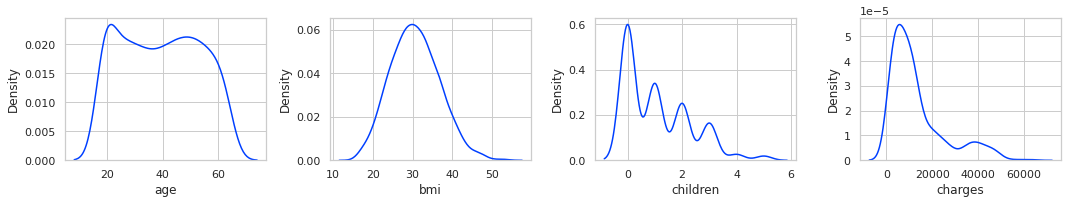

In [17]:
#KDEplot Visual
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

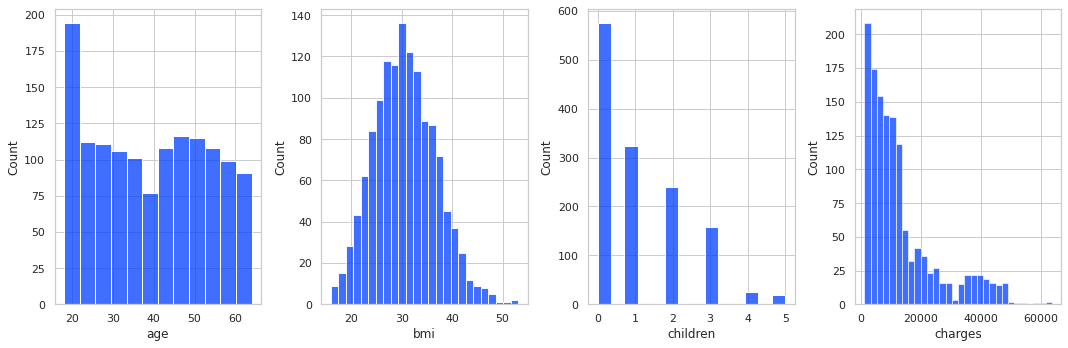

In [18]:
#Histplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

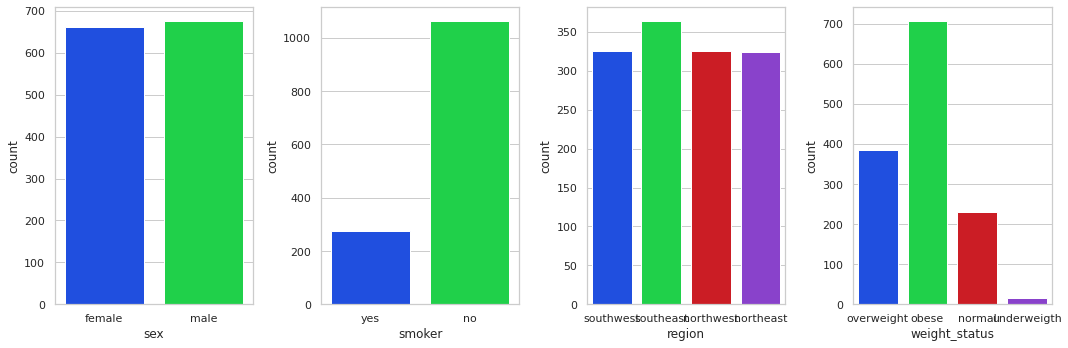

In [19]:


#Countplot Visual
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()



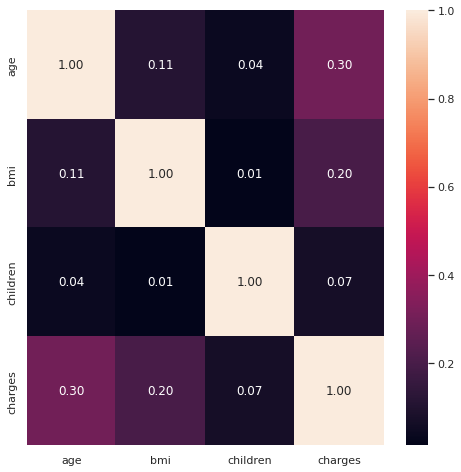

In [20]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

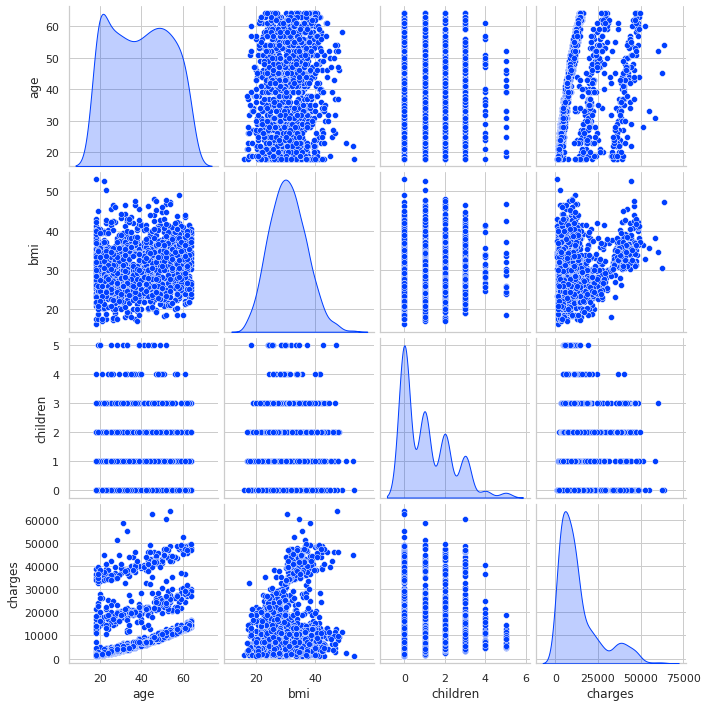

In [21]:


#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')



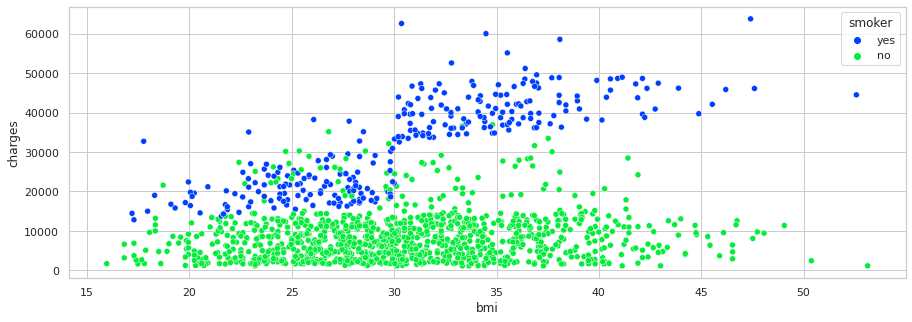

In [22]:


#Scatterplor Visualization
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

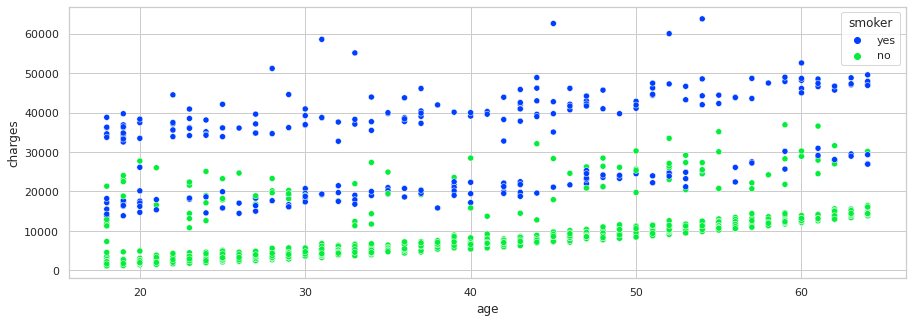

In [23]:


#Scatterplor Visualization
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)



In [24]:


#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)



,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


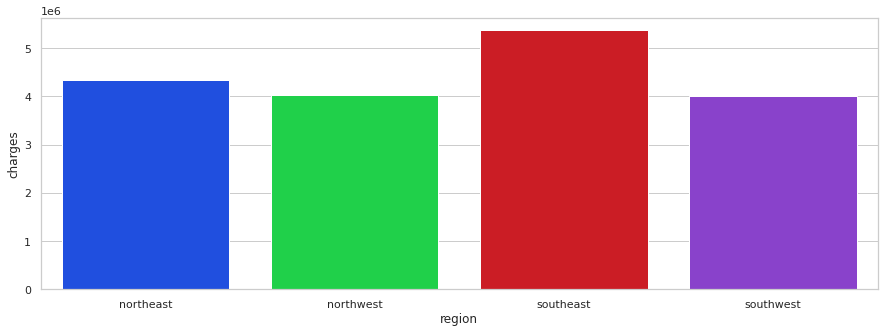

In [25]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

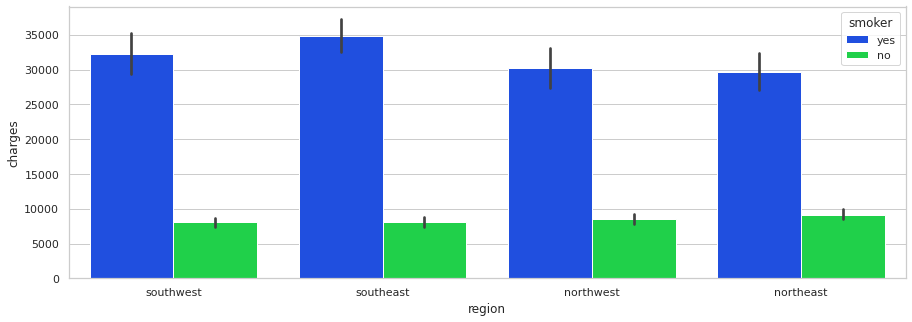

In [26]:


#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)



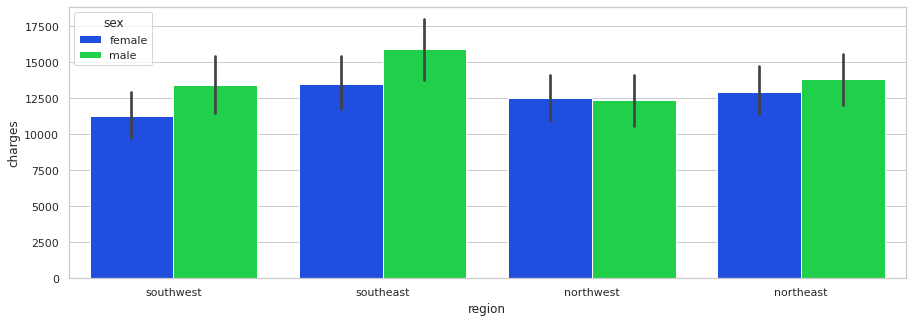

In [27]:


#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)



In [28]:


#Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)



,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


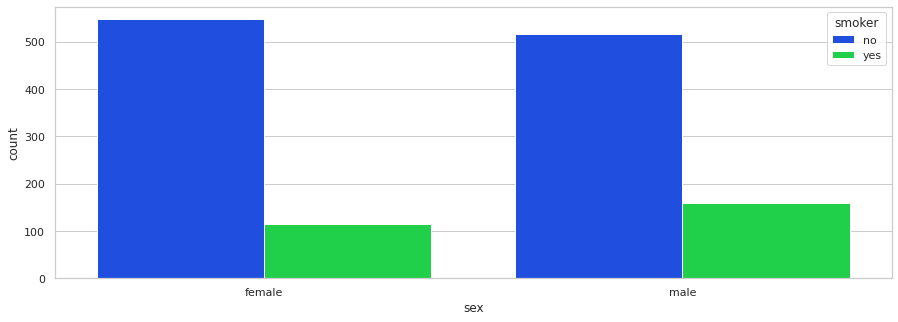

In [29]:
#Barplot Visualization
sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)


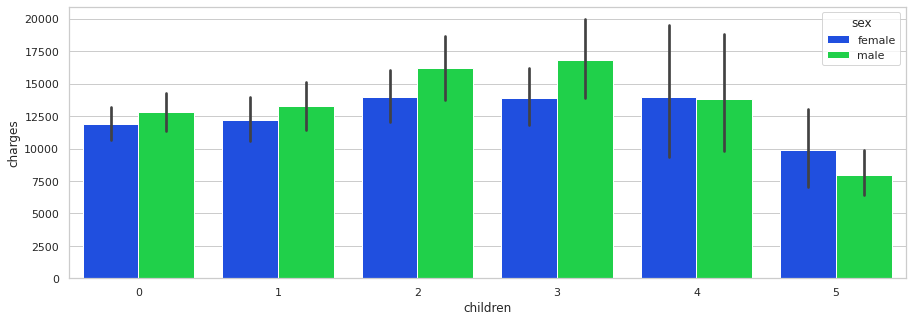

In [30]:
#Barplot with Hue Sex
sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

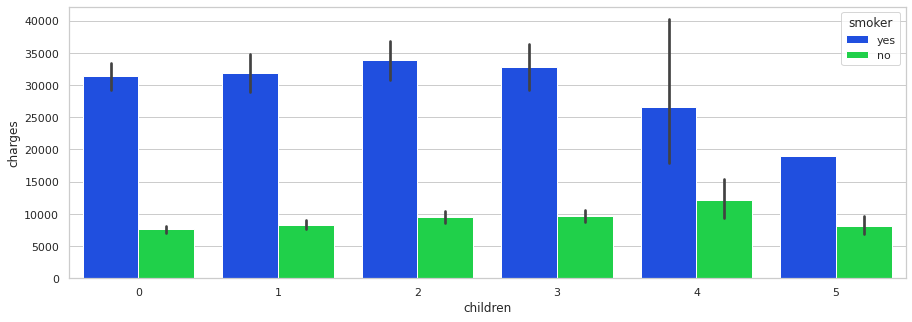

In [31]:
#Barplot with Hue Smoker
sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)



In [32]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


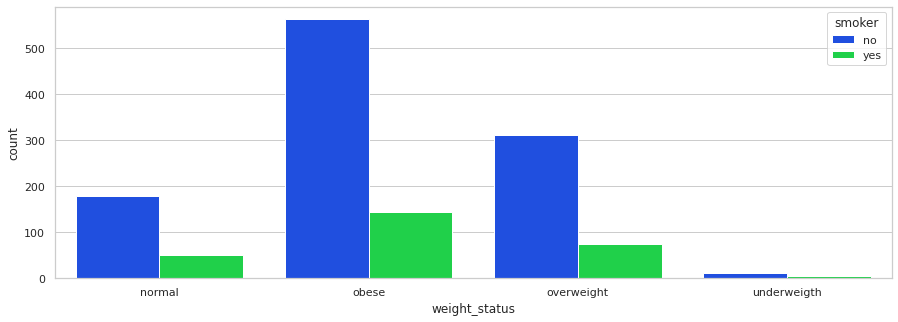

In [33]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [34]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [35]:


#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


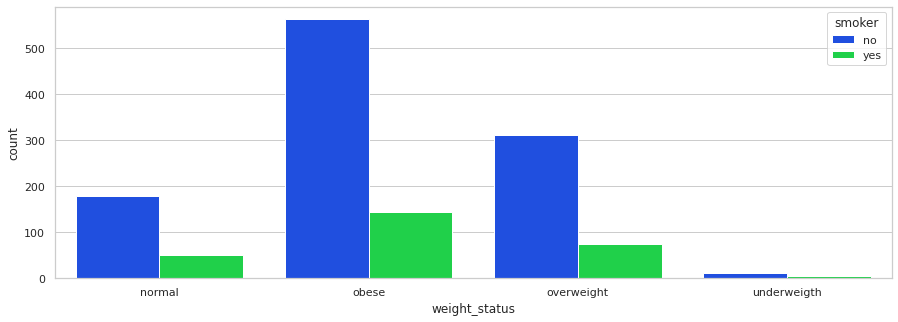

In [36]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [37]:
#Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [38]:


#Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost



,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


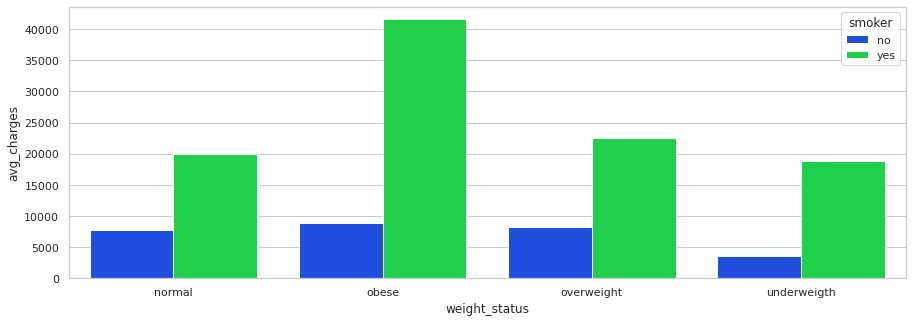

In [39]:
#Average Charges Barplot
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

Data process

In [40]:
#Check Missing Value
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

In [41]:


#Check Duplicate Value
df.duplicated().sum()



1

In [42]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

In [43]:


#Copy DataFrame
dfori = df.copy()



Feature transform

In [44]:


#Ordinal Encoding
dfori['smoker'] = dfori['smoker'].replace({'yes' : 0, 'no' : 1})

#One Hot Encoding
sex_ori = pd.get_dummies(dfori['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfori['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfori['weight_status'], prefix = 'status')

#Concat Feature Encoding
dfori = pd.concat([dfori, sex_ori], axis=1)
dfori = pd.concat([dfori, region_ori], axis=1)
dfori = pd.concat([dfori, status_ori], axis=1)

In [45]:


#Drop Encoded Feature
dfori = dfori.drop(columns = ['sex', 'region', 'weight_status'])

#Check df
dfori



,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,1,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1,1725.55230,0,1,0,0,1,0,0,1,0,0
2,28,33.000,3,1,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,1,21984.47061,0,1,0,1,0,0,1,0,0,0
4,32,28.880,0,1,3866.85520,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0,1,0,1,0,0,0,1,0,0
1334,18,31.920,0,1,2205.98080,1,0,1,0,0,0,0,1,0,0
1335,18,36.850,0,1,1629.83350,1,0,0,0,1,0,0,1,0,0
1336,21,25.800,0,1,2007.94500,1,0,0,0,0,1,0,0,1,0


In [46]:


dfori.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   uint8  
 6   sex_male            1337 non-null   uint8  
 7   reg_northeast       1337 non-null   uint8  
 8   reg_northwest       1337 non-null   uint8  
 9   reg_southeast       1337 non-null   uint8  
 10  reg_southwest       1337 non-null   uint8  
 11  status_normal       1337 non-null   uint8  
 12  status_obese        1337 non-null   uint8  
 13  status_overweight   1337 non-null   uint8  
 14  status_underweigth  1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.7 K

In [47]:
#Grouping Features for Normalization
norm_ori = dfori.drop(columns = ['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweigth'],
      dtype='object')


In [48]:
#Normalization Features
for i in range(len(norm_ori)):
    dfori[norm_ori[i]] = MinMaxScaler().fit_transform(dfori[norm_ori[i]].values.reshape(len(dfori), 1))

In [49]:
#Check dfori
dfori

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,0.021739,0.321227,0.0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,1.0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


model

In [50]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [51]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [52]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [53]:


#Separating Target & Features
x1 = dfori.drop(columns = ['charges']) #Features
y1 = dfori['charges'] #Target



In [54]:


#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)



In [55]:
print(dfori['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [56]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), '\n')

Model: LinearRegression
MAE : 4376.38
RMSE : 6186.75
R2 score : 0.78
Train Accuracy : 0.7404840141704818
Test Accuracy : 0.7763182706891147
None 

Model: DecisionTree
MAE : 2748.38
RMSE : 5948.09
R2 score : 0.79
Train Accuracy : 1.0
Test Accuracy : 0.7932427577987549
None 



In [57]:
prediction1

array([ 9361.3268 , 24671.66334,  8556.907  , 39047.285  ,  4949.7587 ,
        8978.1851 , 36189.1017 ,  2154.361  ,  7633.7206 , 11015.1747 ,
       13012.20865, 21774.32215, 38415.474  , 13470.86   ,  5836.5204 ,
        8825.086  ,  2362.22905, 39774.2763 ,  4931.647  ,  3766.8838 ,
        1880.487  , 22462.04375,  8083.9198 , 19719.6947 , 37079.372  ,
       26018.95052, 42560.4304 , 45710.20785,  9290.1395 , 26392.26029,
        3943.5954 ,  9386.1613 ,  1837.237  , 12913.9924 , 48675.5177 ,
        9174.13565,  6799.458  ,  4906.40965, 22412.6485 ,  8240.5896 ,
        2741.948  , 21259.37795, 40941.2854 ,  8964.06055,  8825.086  ,
        3171.6149 ,  2217.46915,  7727.2532 ,  3956.07145,  6986.697  ,
        3987.926  ,  5662.225  , 19964.7463 ,  1136.3994 ,  7160.3303 ,
        8219.2039 ,  9617.66245,  3208.787  , 39774.2763 ,  6986.697  ,
       10381.4787 ,  5246.047  , 29186.48236,  1705.6245 , 10325.206  ,
       29186.48236,  7265.7025 , 21774.32215, 17178.6824 , 12347

In [58]:


LinearRegression().get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [59]:
#List Hyperparameters
hyperparameters = dict(
                       fit_intercept = [True, False],
                       n_jobs = [-1, 0, 1, 2],
                       normalize = [True, False],
                       copy_X = [True, False]
                      )

#Initiation
LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2')
LR_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = LR_tuned1.predict(xtest1)
evaluation(LR_tuned1, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4305.31
RMSE : 6221.51
R2 score : 0.77
Train Accuracy : 0.7432025636860959
Test Accuracy : 0.7737981066498895


In [60]:
#Check Best Hyperparameter
best_hyperparameter(LR_tuned1.best_estimator_, hyperparameters)

Best fit_intercept: False
Best n_jobs: 1
Best normalize: False
Best copy_X: False


In [61]:
alpha = [0.01, 0.1, 1, 2, 5, 10, 100]
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

Ridge1 = Ridge()
Ridge_tuned = RandomizedSearchCV(Ridge1, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
hyper_ridge = Ridge_tuned.fit(xtrain1, ytrain1)

In [62]:
prediction1 = hyper_ridge.predict(xtest1)
evaluation(hyper_ridge, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4312.37
RMSE : 6229.02
R2 score : 0.77
Train Accuracy : 0.7431790989612017
Test Accuracy : 0.7732512319942585


In [63]:
#Check Best Hyperparameter
best_hyperparameter(hyper_ridge.best_estimator_, hyperparameters)

Best alpha: 0.1
Best solver: lsqr
Best fit_intercept: True
